## Importing libraries

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import DBSCAN

In [2]:
#!pip install pyarrow

## Data visualization

In [3]:
def graph_3d(df, cluster):
    
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    if cluster == False:
        ax.scatter(df['x'], df['y'], df['z'], c='b', marker='o', s=8)
        
    else:  
        # Browse clusters and display points with different colours
        for cluster_id in df[cluster].unique():
            if cluster_id == -1:  # Points considered as noise
                continue
            cluster_data = df[df[cluster] == cluster_id]
            ax.scatter(cluster_data['x'], cluster_data['y'], cluster_data['z'], label=f'Cluster {cluster_id}', s=8)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    ax.legend()

    plt.show()

In [4]:
def graph_2d(df, cluster, axis1, axis2):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    if cluster == False:
        ax.scatter(df[axis1], df[axis2], s=8)
        
    else:
        for cluster_id in df[cluster].unique():
            if cluster_id == -1:
                continue

            cluster_data = df[df[cluster] == cluster_id][[axis1, axis2]]

            ax.scatter(cluster_data['x'], cluster_data['y'], label=f'Cluster {cluster_id}', s=8)

    # Add axis labels
    ax.set_xlabel(axis1.upper())
    ax.set_ylabel(axis2.upper())
    
    ax.set_title('2D Scatter Plot')

    # Add a legend
    ax.legend()

    # Show the 2D visualization
    plt.show()

## Data Exploration

In [5]:
file_path = "files/lidar_cable_points_easy.parquet"

In [6]:
df_coordinates = pd.read_parquet(file_path)
df_coordinates.head()

,x,y,z
2211,6.196634,-13.157755,10.582272
2905,-10.440643,17.264460,10.926065
1411,2.977432,-3.552676,10.072814
251,5.924494,-10.974960,10.342501
794,-7.062873,12.850664,10.557997


In [7]:
print("DataFrame Length :", len(df_coordinates))

DataFrame Length : 1502


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


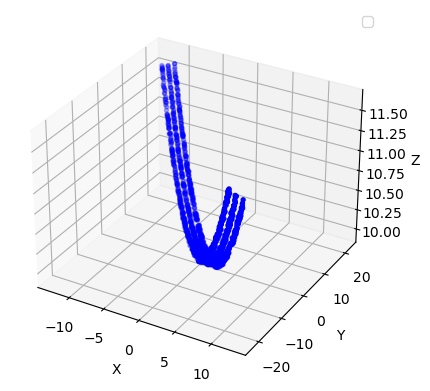

In [8]:
graph_3d(df_coordinates, False)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


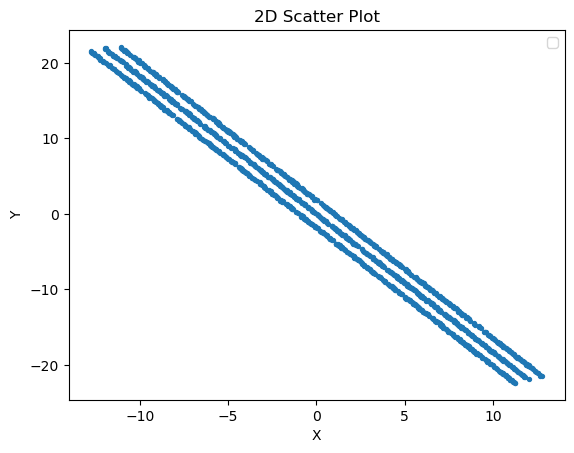

In [9]:
graph_2d(df_coordinates, False, 'x', 'y')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


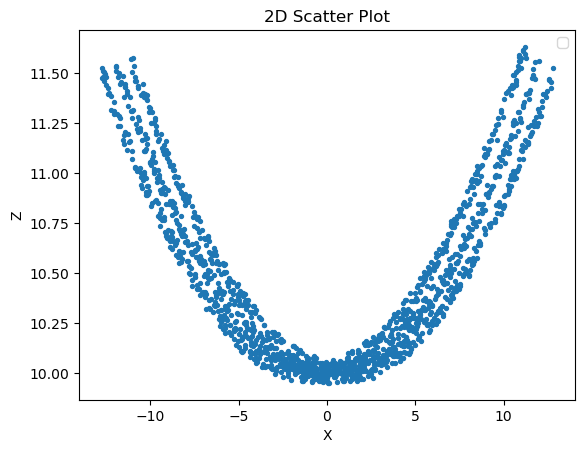

In [10]:
graph_2d(df_coordinates, False, 'x', 'z')

## Clustering large groups

In [11]:
dbscan = DBSCAN(eps=0.6, min_samples=5)

df_coordinates['cluster'] = dbscan.fit_predict(df_coordinates[['x', 'z']])

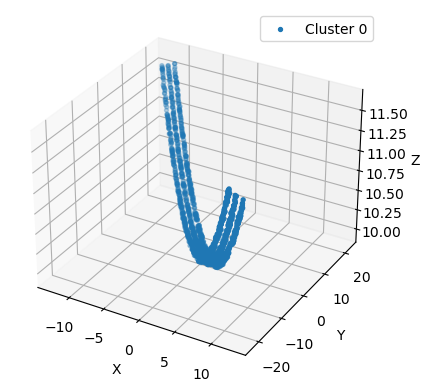

In [12]:
graph_3d(df_coordinates, 'cluster')

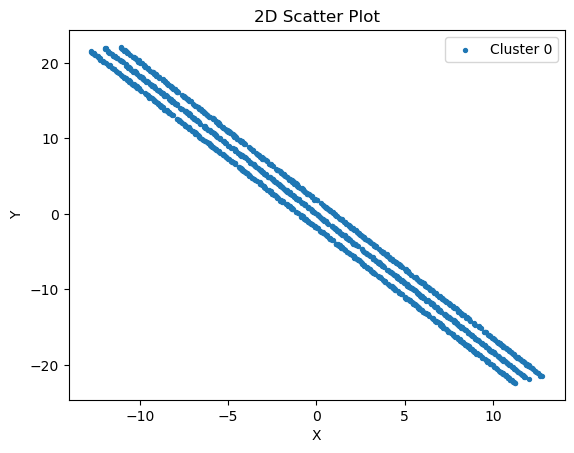

In [13]:
graph_2d(df_coordinates, 'cluster', 'x', 'y')

## Wire clustering

In [14]:
df_coordinates['cluster_advanced'] = -1

for cluster_id in df_coordinates['cluster'].unique():
    if cluster_id == -1:
        continue
        
    cluster_data = df_coordinates[df_coordinates['cluster'] == cluster_id]
    
    dbscan_advanced = DBSCAN(eps=0.65, min_samples=4)
    
    # Fit dbscan model
    cluster_labels_advanced = dbscan_advanced.fit_predict(cluster_data[['x', 'y']])
    
    # Update df_coordinates with new results
    combined_values = (
        df_coordinates.loc[df_coordinates['cluster'] == cluster_id, 'cluster'].astype(str) +
        '_' +
        cluster_labels_advanced.astype(str)
    )
    
    combined_values[cluster_labels_advanced == -1] = '-1'
    
    df_coordinates.loc[df_coordinates['cluster'] == cluster_id, 'cluster_advanced'] = combined_values

print(df_coordinates)

              x          y          z  cluster cluster_advanced
2211   6.196634 -13.157755  10.582272        0              0_0
2905 -10.440643  17.264460  10.926065        0              0_0
1411   2.977432  -3.552676  10.072814        0              0_1
251    5.924494 -10.974960  10.342501        0              0_2
794   -7.062873  12.850664  10.557997        0              0_2
...         ...        ...        ...      ...              ...
1043  11.752706 -19.651017  11.259984        0              0_1
2498  -0.718055  -0.646010  10.018425        0              0_0
1938  -9.744563  19.548960  11.272980        0              0_1
1621  -2.060735   5.730059  10.090603        0              0_1
1070  11.126289 -18.497903  11.070958        0              0_1

[1502 rows x 5 columns]


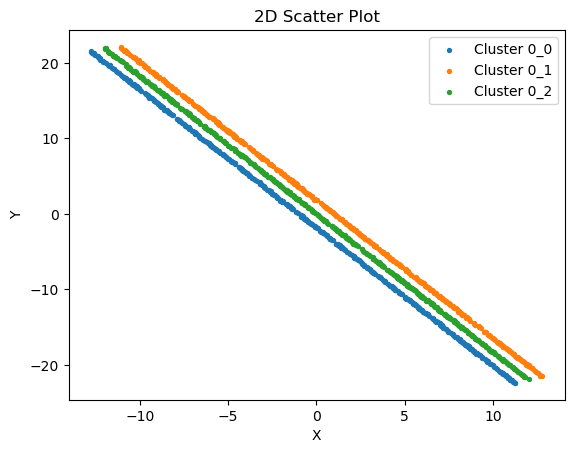

In [15]:
graph_2d(df_coordinates, 'cluster_advanced', 'x', 'y')

## Displaying the different clusters

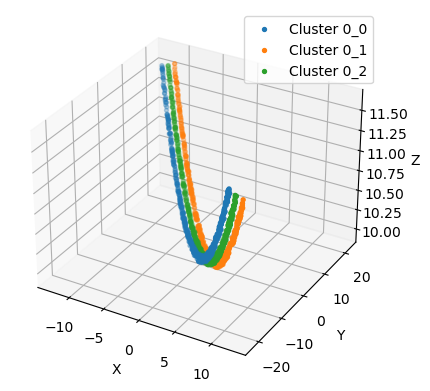

In [16]:
graph_3d(df_coordinates, 'cluster_advanced')